# A Kernel Test of Goodness of Fit
Team: Liza Kiseleva, Daniil Leontyev, 
Kundyz Onlabek, Mohammed Deifallah

[Google drive](https://drive.google.com/drive/folders/10hSW7ULzBwI-Ky8oGhs-eoKDG5avK7VD)

### **Introduction**

Statistical tests of goodness-of-fit are a fundamental tool in statistical analysis, dating back to the test of Kolmogorov and Smirnov.  Given a set of samples, the test determines how likely it is that these were generated from a target density function.

In the multivariate setting, Gorham and Mackey (2015) proposed an elegant measure of sample quality with respect to a target. This measure is a maximum discrepancy between empirical sample expectations and target expectations over a large class of test functions, constructed so as to have zero expectation over the target distribution by use of a Stein operator. It is desired to determine if the empirical discrepancy measure is large enough to reject the null hypothesis that the sample arises from the target distribution.

### **The problem statement**
 


One approach is to establish the asymptotic behaviour of the test statistic and to set a test threshold at a large quantile of the asymptotic distribution. However, the asymptotic behaviour of the Sobolev Stein discrepancies is a challenging open problem, due to the complexity of the function class used; and it is not clear how one would compute p-values for this statistic or determine when the goodness of fit test would allow us to accept the null hypothesis.

### **The proposed solution**

The key contribution of this project (Chwialkowski et al. 2016) is to define a statistical test of goodness-of-fit, based on a Stein divergence computed in a Reproducing Kernel Hilbert Space (RKHS). The test statistic is based on an empirical estimate of this divergence, taking the form of a V-statistic in terms of the log gradients of the target density and the kernel. Then, a statistical test is derived, both for i.i.d. and non-i.i.d. samples, where the null distribution quantiles are estimated using a wild bootstrap procedure. Finally, the test is applied to quantifying convergence of approximate Markov Chain Monte Carlo methods, statistical model criticism, and evaluating the quality of fit vs model complexity in nonparametric density estimation.

# Algorithms

We investigate the properties of functions $f := (f_{1},...,f_{d})$ of RKHS (Reproducing Kernal Hilbert Space).   
Let us defing the Stein operator which acts on $f_{i}$ as $T_pf:=\sum_{i=1}^d\left(\dfrac{\partial \log p(x)}{\partial x_i}f_i(x) + \dfrac{\partial f_i(x)}{\partial x_i}\right)$  
The expected value of Stein operator can be expressed in trms of function that depends on gradients of the log-density and the kernel: $\mathop{\mathbb{E}}T_p f(Z) = \langle f, \mathop{\mathbb{E}}\xi_p (Z) \rangle_{F^d} = \sum_{i=1}^d \langle f_i,  \mathop{\mathbb{E}}\xi_{p,i}(Z)\rangle_F$ $\xi_p(x, \cdot) := [\nabla \log p(x)k(x, \cdot) + \nabla k(x, \cdot)]$  
We define a Stein discrepance in RKHS as $ S_p(Z) := \sup _{||f||<1}  \mathop{\mathbb{E}}(T_p f)(Z) - \mathop{\mathbb{E}}(T_p f)(X)  = \sup _{||f||<1} \mathop{\mathbb{E}}(T_p f)(Z)  = \sup _{||f||<1} \langle f, \mathop{\mathbb{E}}\xi_p(Z) \rangle_{F^d}  = ||\mathop{\mathbb{E}} \xi_p(Z)||_{F^d}$    




### **Null hypothesis** 
Samples $Z_{i}$ are distributed according to the target distribution $p$ 

### **Bootstrap testing**  
Our primary goal is to estimate the squared Stein discrepancy $S(Z)^{2}$ from samples $Z_{i}$ . For this purpose V-Statistic is our estimator, and take the form $V_n = \dfrac 1 {n^2} \sum_{i,j=1}^n h(Z_i, Z_j)$  
$h(\cdot,\cdot )$ is defined as $ h_p(x, y) := \nabla \log p(x)^\top \nabla \log p(y) k (x, y) + \nabla \log p(y)^\top \nabla_x k(x, y)  + \nabla \log p(x)^\top \nabla_y k(x, y) + \langle \nabla_x k(x, \cdot), \nabla_y k(\cdot, y) \rangle_{F^d}$  
Wild bootstrap technique solves two problems:  
1. It allows to simulate from the null distribution to compute p-values.
2. It considers the correlation structure in the ${Z}_i$ via a Markov chain taking values in {-1; 1}:  
$W_{1,n}=1$  
$ W_{t, n} = I\{U_t>a_n\}W_{t-1, n} - I\{ U_t< a_n \} W_{t-1,n} $,  
where $U_{t}$ are uniform i.i.d. random variables and $a_{n}$ is the probability of $W_{t,n}$ changes sign.   

Bootstrapped V-statistic is obtained:  
$ B_n = \dfrac 1 {n^2} \sum_{i,j=1}^n W_{i, n} W_{j, n} h(Z_i, Z_j) $

Estimations depend on the kernel choise. 


### **Test procedure for testing the null hypothesis:**  
1. Calculate the $V_{n}$ statistic.
2. Obtain wild bootstrap samples $B_{n}$ and estimate $1-\alpha$ quantile of the samples.
3. Reject the null hypothesis if $V_{n}$ exceeds the quantile. 

# Experiments

Estimation depend on the kernel choise. Implemented tests include both linear time (`GaussianSteinTest`) and quadratic time (`GaussianQuadraticTest`, `QuadraticMultiple`, `QuadraticMultiple2`) kernels.  

In high dimensions linear time kernel might preform better than quadratic time. Therefore, it is a subject of interest to analyze performance of other kernels.

## Imports

In [ ]:
!pip install Gpy

     |████████████████████████████████| 1.0MB 8.3MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for Gpy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633916 sha256=6ced3b3d6a10779d50633babc8304a00fb9142d5ac6dac1e276684741aaa27d3
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=5c81167deee270306e3d41482c80ba64d1b3e834038f7266a88f0a747f442163
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built Gpy paramz


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/Skoltech/Statistic/project'

/content/drive/My Drive/Skoltech/Statistic/project


In [ ]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from tools.latex_plot_init import plt

from mpl_toolkits.mplot3d import Axes3D

from kernel_exp_family.estimators.finite.gaussian import KernelExpFiniteGaussian
from samplers.MetropolisHastings import metropolis_hastings
from stat_test.linear_time import GaussianSteinTest 
from stat_test.quadratic_time import GaussianQuadraticTest, QuadraticMultiple, QuadraticMultiple2
from GPy.kern import RBF
from GPy.models.gp_regression import GPRegression
from scipy.io.matlab.mio import loadmat
from time import time
from statsmodels.tsa.stattools import acf
from sgld_test.mcmc_convergance.cosnt import NUMBER_OF_TESTS, NO_OF_SAMPELS_IN_TEST, CHAIN_SIZE, SEED, SAMPLE_SIZE
from sgld_test.likelihoods import gen_X, log_probability

from tools.tools import store_results
from statsmodels.tsa.stattools import acf
import itertools
from google.colab import output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Goodness of fit
Algorithm demonstration.

The first step is to take a sample.


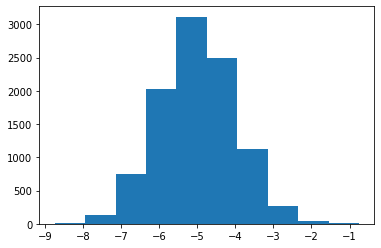

In [33]:
m=5
X = np.random.randn(10000)-m
plt.hist(X)
plt.show()

The second is to choose the destribution and calculate gradient of logarithm of this distribution.

In [27]:
def grad_log_normal(m):
    def grad_log_mix(x):
        e2mx = np.exp(2 * m * x)
        nom = m - e2mx * m + x + e2mx * x
        denom = 1 + e2mx
        return -nom / denom
    return grad_log_mix

And finally  calculate the statistic and p-value.

In [34]:
me = GaussianSteinTest(grad_log_normal(m),m)
print(me.compute_pvalue(X))

0.2771990412745045


## TStudent

$H_0:$  random variables come form normal distibution

In [ ]:
SGLD_EPSILON = 0.0478

P_CHANGE = 0.1

N = 500
DEGREES_OF_FREEDOM = [1,3,5,7,9,11]+[1000]
MC_PVALUES_REPS = 400
TEST_CHAIN_SIZE = 2*10**6

# gradient of logarithm of density of standard normal.
def grad_log_normal(x):
    return -x

def log_normal(x):
    return -x**2/2

def grad_log_t_df(df):
    def grad_log_t(x):
        return -(df+1.0)/2.0*np.log(1+x**2/df)
    return grad_log_t

def sample_sgld_t_student(N,degree_of_freedom,epsilon):
    grd_log = grad_log_t_df(degree_of_freedom)
    X =  metropolis_hastings(grd_log, chain_size=N, thinning=1, x_prev=np.random.randn(),step=0.50)
    return X

# estimate size of thinning
def get_thinning(X,nlags = 50):
    autocorrelation = acf(X, nlags=nlags, fft=True)
    # find correlation closest to given v
    thinning = np.argmin(np.abs(autocorrelation - 0.5)) + 1
    return thinning, autocorrelation

def normal_mild_corr(N):
    X =  metropolis_hastings(log_normal, chain_size=N, thinning=1, x_prev=np.random.randn(),step=0.55)
    return X

In [ ]:
N = 1400

DEGREES_OF_FREEDOM = [1, 3,6,9,11,np.inf]
MC_PVALUES_REPS = 100
TEST_CHAIN_SIZE = 2 * 10 ** 6

def gen(N, df, thinning=1):
    log_den = log_normal
    if df < np.Inf:
        log_den = grad_log_t_df(df)
    return metropolis_hastings(log_den, chain_size=N, thinning=thinning, x_prev=np.random.randn(), step=0.5)

def get_pval(X, tester, p_change):
    U_stat, _ = tester.get_statistic_multiple(X)
    return tester.compute_pvalues_for_processes(U_stat, p_change)

def get_pair(sample_size, df, thinning, tester, p_change):
    X = gen(sample_size, df, thinning)
    pval = get_pval(X, tester, p_change)
    return [df, pval]

### Studen-t density 

The samples were generated using a Metropolis–Hastings algorithm, with a Gaussian random walk (variance equal to $0.5$). So it is temporal correlation.

 /usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


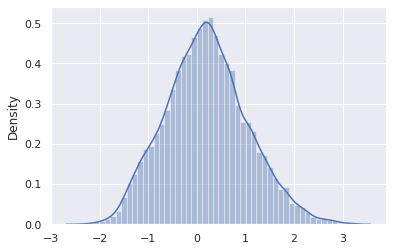

In [ ]:
def almost_t_student(N,df,epsilon):
    samples = np.zeros(N)
    xt = 0
    for t in range(N):
        delta = epsilon/2.0*(-(1+df)*xt/(df+xt**2.0)) + np.sqrt(epsilon)*np.random.randn()
        xt = xt + delta
        samples[t] = xt
    return samples

X = almost_t_student(20000,50.0,0.01)

sns.set(color_codes=True)
sns.distplot(X);
plt.show()

 /usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.


[1.         0.93336879 0.87112468 0.81195754 0.75632586 0.70111433
 0.6552849  0.60730721 0.55399214 0.51259499 0.47522629]
0.012429216196844384
1
3


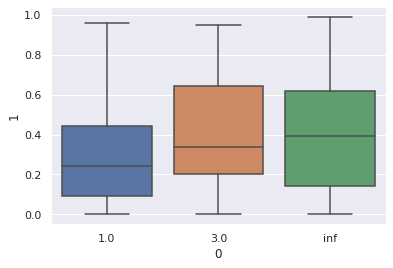

In [ ]:
N = 500
dfs = range(1, 11, 2)
mc_reps = 100
res = np.empty((0,2))

def correlatet_t(X,N):
    fc = np.random.rand(N)
    X= X + np.random.randn(N)*0.01
    return X

print(acf(X,nlags=10))

dfs = range(1, 4, 2)
mc_reps = 100
res = np.empty((0,2))

block = N/np.log(N)
p_change  = 1.0/block
print(p_change)

for df in dfs:
    print(df)
    for mc in range(mc_reps):
        # print(mc)
        X = almost_t_student(10*N,df,0.01)
        X = X[::10]
        me = GaussianQuadraticTest(grad_log_normal)
        U_stat,_ = me.get_statistic_multiple(X)

        pval = me.compute_pvalues_for_processes(U_stat,p_change)
        res = np.vstack((res,np.array([df, pval])))

for mc in range(mc_reps):
        X = almost_t_student(10*N,100,0.01)
        X = X[::10]
        me = GaussianQuadraticTest(grad_log_normal)
        U_stat,_ = me.get_statistic_multiple(X)
        pval = me.compute_pvalues_for_processes(U_stat,p_change)
        res = np.vstack((res,np.array([np.Inf, pval])))

np.save('results.npy',res)

df = pd.DataFrame(res)
pr =sns.boxplot(x=0,y=1,data=df)
plt.show()

### Dependency p-value on $a_n$ parameter

In this part, we study the dependence of the p-value, and therefore the test results, on the given parameter $a_n$.

$$V_n = \dfrac 1 n^2 \sum_{i,j=1}^n h(Z_i, Z_j)$$

$$ W_{t, n} = I\{U_t>a_n\}W_{t-1, n} - I\{ U_t< a_n \} W_{t-1,n} $$

$$ B_n = \dfrac 1 n^2 \sum_{i,j=1}^n W_{i, n} W_{j, n} h(Z_i, Z_j) $$

$1, 5, 10$ or $\infty$ degrees of
freedom were considered, where $\infty$  is equivalent to sampling from a standard normal distribution.

In [ ]:
def plot_st_norm_box(results):
    df = pd.DataFrame(results)

    plt.figure()
    sns.set_style("whitegrid")
    sns.boxplot(x=0, y=1, data=df,palette="BuGn_d")

    plt.tight_layout()
    plt.ylabel('p values')
    plt.ylim([0,1])
    plt.xlabel('degrees of freedom')

#### $a_n = 0.5$ 

In [ ]:
# Attention! It may run more than 24 hours!
P_CHANGE = 0.5
results = []
thinning=1
for df in DEGREES_OF_FREEDOM*MC_PVALUES_REPS:
    pair = get_pair(N , df, thinning, tester, P_CHANGE)
    results.append(pair)
np.save('results_bad.npy', results)

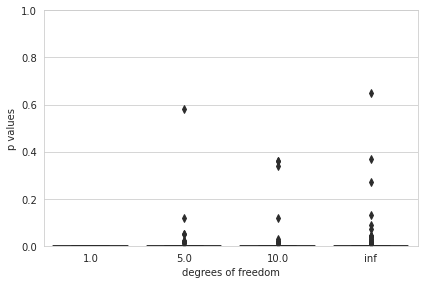

In [ ]:
results = np.load('data/results_bad.npy')
plot_st_norm_box(results)

The parameter $a_n$ is large and the Bn are low. Therefore it is very likely that $V_n$ > $B_n$. So the test is too conservative.
Because we cannot reject the null hypothesis in the case when the number of degrees of freedom $=\infty$

#### $a_n = 0.02$ 

In [ ]:
# Attention! It may run more than 24 hours!
P_CHANGE = 0.02
results = []
for df in DEGREES_OF_FREEDOM*MC_PVALUES_REPS:
    pair = get_pair(N , df, thinning, tester, P_CHANGE)
    results.append(pair)

np.save('results_good.npy', results)

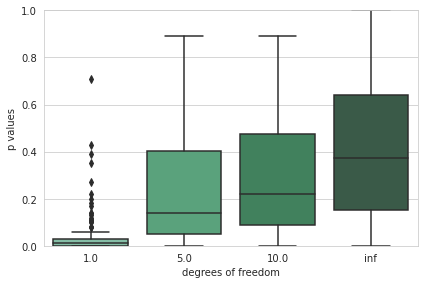

In [ ]:
results = np.load('data/results_good.npy')
plot_st_norm_box(results)

Due to a large autocorrelation withing the samples, the power of the test is small (effective sample size
is small).  Because we need reject the null hypothesis in the case when the number of degrees of freedom  $\ne \infty$

#### $a_n = 0.1 +$ Thining  

In [ ]:
# Attention! It may run more than 24 hours!
P_CHANGE = 0.1
results = []
thinning = 20
for df in DEGREES_OF_FREEDOM*MC_PVALUES_REPS:
    pair = get_pair(N , df, thinning, tester, P_CHANGE)
    results.append(pair)
np.save('results_thinning.npy', results)

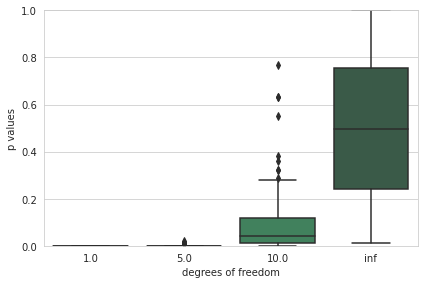

In [ ]:
results = np.load('data/results_thinning.npy')
plot_st_norm_box(results)

Thining whith $a_n = 0.1$ show really good result. Most of the autocorrelation within the sample is canceled by thinning. 

In a general, authors recommend to thin a chain so
that $Cor(X_t, X_{t−1}) < 0.5$, set $a_n = 0.1/k$, and run test
with at least $max(500k, d100)$ data points, where $k < 10$,
and $d$ is data dimensionality.

This recomendation based on the correlation and thining analysis bellow.

thinning for sgld t-student simulation  8 0.4369767309070368
[ 1.00000000e+00  4.36197849e-01  1.90465346e-01  8.60562989e-02
  3.79755593e-02  2.14554304e-02  1.16442593e-02  7.09827114e-03
  4.02071061e-03  6.27673161e-03  3.32574468e-03  1.55840777e-03
  2.10643633e-03 -7.84215426e-04 -2.08128511e-03 -2.53146516e-03
 -2.86185570e-04  2.62063130e-03 -1.64430934e-03 -1.07140167e-03
 -1.90891885e-03 -1.87761646e-03 -5.41214338e-03 -3.69303684e-03
 -1.79928282e-03  1.19667544e-03 -1.76625160e-03 -4.92782541e-04
 -9.52301023e-04 -2.36364853e-03 -9.07286881e-03]


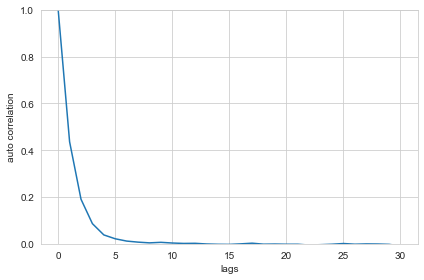

In [ ]:
X = normal_mild_corr(TEST_CHAIN_SIZE)
sgld_thinning, autocorr = get_thinning(X,500)
print('thinning for sgld t-student simulation ', sgld_thinning,autocorr[sgld_thinning])


X = normal_mild_corr(sgld_thinning *100000)
X = X[::sgld_thinning]

r= acf(X,nlags=30)
print(r)

sns.set_style("whitegrid")
plt.plot(r)
plt.xlabel('lags')
plt.ylabel('auto correlation')
plt.ylim([0,1])
plt.tight_layout()
# plt.savefig('../write_up/img/sgld_lags.eps')

## Statistical model criticism on Gaussian Processes

Now the test is applied to the problem of statistical model criticism for GP regression. The solar dataset is used with 1D regression problem with $N=402$ pairs $(X,y)$. $N_{train}=361$ data is fitted using GP with a squared exponential kernel and a Gaussian noise model. Standard maximum likelihood II is performed on the hyperparameters (length-scale, overall scale, noise-variance). Then the test is applied to the remaining $N_{test} = 41$ data. The test attempts to falsify the null hypothesis that the solar dataset was generated from the plug-in predictive distribution (conditioned on training data and predicted position) of the GP.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 02-solar.mat to 02-solar.mat


 /usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


num_train: 90
num_test: 10


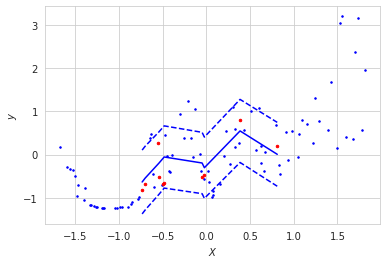

 /usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not

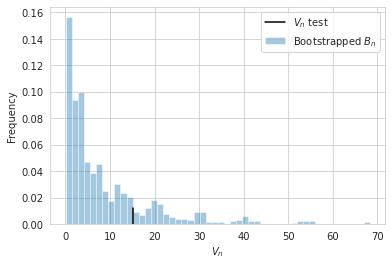

In [ ]:
sns.set_style("whitegrid")

def prepare_dataset(X, y):
    N = len(X)
    train_test_ind = int(0.9 * N)
    
    inds = np.random.permutation(N)
    X = X[inds]
    y = y[inds]
    
    # spit into train and test
    X_test = X[train_test_ind:]
    y_test = y[train_test_ind:]
    X_train = X[:train_test_ind]
    y_train = y[:train_test_ind]
    N = len(X_train)
    N_test = len(X_test)
    
    # sort for easy plotting
    temp = X_test[:, 0].argsort()
    y_test = y_test[temp]
    X_test = X_test[temp]
    temp = X[:, 0].argsort()
    y = y[temp]
    X = X[temp]
    
    # normalise by training data statistics
    X_mean = np.mean(X_train)
    X_std = np.std(X_train)
    X_train -= X_mean
    X_train /= X_std
    X_test -= X_mean
    X_test /= X_std
    
    y_mean = np.mean(y_train)
    y_std = np.std(y_train)
    y_train -= y_mean
    y_train /= y_std
    y_test -= y_mean
    y_test /= y_std
    
    return X_train, y_train, X_test, y_test, N, N_test

def bootstrap_null(U_matrix, num_bootstrap=1000):
    bootstrapped_stats = np.empty(num_bootstrap)
    N = U_matrix.shape[0]
    
    for i in range(num_bootstrap):
        W = np.sign(np.random.randn(N))
        WW = np.outer(W, W)
        st = np.mean(U_matrix * WW)
        bootstrapped_stats[i] = N * st
    
    return bootstrapped_stats

def compute_gp_regression_gradients(y_test, pred_mean, pred_std):
    return -(y_test - pred_mean) / pred_std ** 2

def sample_null_simulated_gp(pred_mean, pred_std, num_samples=1000):
    samples = np.empty(num_samples)
    N = len(pred_mean)
    for i in range(num_samples):
        # simulate from predictive distribution and evaluate gradients at those points
        fake_y_test = np.random.randn(N) * pred_std + pred_mean
        fake_gradients = compute_gp_regression_gradients(fake_y_test, pred_mean, pred_std)
        
        # compute test statistic under this alt
        _, samples[i] = s.get_statistic_multiple_custom_gradient(fake_y_test[:, 0], fake_gradients[:, 0])
    
    return samples

data = loadmat("data/02-solar.mat")
X = data['X']
y = data['y']

X_train, y_train, X_test, y_test, N, N_test = prepare_dataset(X, y)

print ("num_train:", len(X_train))
print ("num_test:", len(X_test))

kernel = RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPRegression(X_train, y_train, kernel)
m.optimize()

res = 100
pred_mean, pred_std = m.predict(X_test)
plt.plot(X_test, pred_mean, 'b-')
plt.plot(X_test, pred_mean + 2 * pred_std, 'b--')
plt.plot(X_test, pred_mean - 2 * pred_std, 'b--')
plt.plot(X_train, y_train, 'b.', markersize=3)
plt.plot(X_test, y_test, 'r.', markersize=5)
plt.grid(True)
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.savefig("gp_regression_data_fit.eps", bbox_inches='tight')
plt.show()

s = GaussianQuadraticTest(None)
gradients = compute_gp_regression_gradients(y_test, pred_mean, pred_std)
U_matrix, stat = s.get_statistic_multiple_custom_gradient(y_test[:, 0], gradients[:, 0])

num_test_samples = 10000
null_samples = bootstrap_null(U_matrix, num_bootstrap=num_test_samples)

sns.distplot(null_samples, kde=False, norm_hist=True)
plt.plot([stat, stat], [0, .012], 'black')
plt.legend([r"$V_n$ test", r"Bootstrapped $B_n$"])
plt.xlabel(r"$V_n$")
plt.ylabel(r"Frequency")
plt.savefig("gp_regression_bootstrap_hist.eps", bbox_inches='tight')

plt.show()

The first plot shows training and testing data, and the fitted GP. It can be observed that the Gaussian noise model is a poor fit for this particular dataset.
The second figure shows the distribution over $D = 10000$ bootstrapped V-statistics $B_n$ with $n = N_{test}$. The test statistic lies in an upper quantile of the bootstrapped null distribution stating that it is unlikely the test points were generated by the fitted GP model.

## Convergence in non-parametric density estimation

Finally, the goodness of fit test was applied to measure the quality-of-fit in nonparametric density estimation. Two density models were evaluated: the infinite dimensional exponential family and the approximation to this model using random Fourier features. The implementation of the model assumes the log density takes the form $f(x)$, where $f$ lies in an RKHS induced by a Gaussian kernel with bandwidth 1. The model is fitted using N observations drawn from a standard Gaussian. The quadratic time test is performed on a separate evaluation dataset of fixed size $N_{test} = 500$. The goal was to identify $N$ sufficiently large that the goodness of fit test did not reject the null hypothesis that the model had learned the density sufficiently well (bearning in mind that it is guaranteed to converge for sufficiently large $N$).

In [ ]:
!pip install git+git://github.com/jcrudy/choldate.git

  Cloning git://github.com/jcrudy/choldate.git to /tmp/pip-req-build-0secjjp4
  Running command git clone -q git://github.com/jcrudy/choldate.git /tmp/pip-req-build-0secjjp4
  Created wheel for choldate: filename=choldate-0.1.0-cp36-cp36m-linux_x86_64.whl size=58070 sha256=b883c6cf8c071e936ada9db26e7d2c633d5fda47a559ccd3198094953c16b266
  Stored in directory: /tmp/pip-ephem-wheel-cache-myq12b_t/wheels/46/56/c6/befdb2ca536ea7da32af9ce0938cf548a518404abe7b1365bf
Successfully built choldate


In [ ]:
from kernel_exp_family.estimators.lite.gaussian import KernelExpLiteGaussian

D = 1
N_test = 500
Ns_fit = np.array([5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 2000, 5000])


sigma = 1
lmbda = 0.01

grad = lambda x: est.grad(np.array([x]))[0]
s =  GaussianQuadraticTest(grad)
num_bootstrap = 200

result_fname = os.path.splitext(os.path.basename("data/__filedata__"))[0] + ".txt"

num_repetitions = 150
for _ in range(num_repetitions):
    for N in Ns_fit:
        est = KernelExpLiteGaussian(sigma, lmbda, D, N)
        X_test = np.random.randn(N_test, D)
        
        X = np.random.randn(N, D)
        est.fit(X)
        
        U_matrix, stat = s.get_statistic_multiple(X_test[:,0])
    
        bootsraped_stats = np.empty(num_bootstrap)
        for i in range(num_bootstrap):
            W = np.sign(np.random.randn(N_test))
            WW = np.outer(W, W)
            st = np.mean(U_matrix * WW)
            bootsraped_stats[i] = N_test * st
        
        p_value = np.mean(bootsraped_stats>stat)
        print (N, p_value)

        store_results(result_fname,
                      D=D,
                      N=N,
                      N_test=N_test,
                      num_bootstrap=num_bootstrap,
                      sigma=sigma,
                      lmbda=lmbda,
                      p_value=p_value
                      )

KERNEL_EXP_FAMILY: INFO: 2020-12-20 17:29:18,001: log.<module>(): Global logger initialised with loglevel 20


Could not import BayesOptSearch.
5 0.0
10 0.0
25 0.0
50 0.075
75 0.0
100 0.095
250 0.015
500 0.34
750 0.005
1000 0.9
2000 0.575
5000 0.715
5 0.0
10 0.0
25 0.0
50 0.0
75 0.14
100 0.0
250 0.0
500 0.36
750 0.29
1000 0.27
2000 0.675
5000 0.155
5 0.0
10 0.0
25 0.0
50 0.0
75 0.0
100 0.0
250 0.055
500 0.07
750 0.905
1000 0.48
2000 0.945
5000 0.455
5 0.0
10 0.0
25 0.0
50 0.0
75 0.05
100 0.015
250 0.01
500 0.025
750 0.955
1000 0.015
2000 0.69
5000 0.885
5 0.0
10 0.0
25 0.01
50 0.0
75 0.0
100 0.0
250 0.075
500 0.745
750 0.16
1000 0.24
2000 0.855
5000 0.46
5 0.0
10 0.0
25 0.0
50 0.0
75 0.0
100 0.18
250 0.095
500 0.87
750 0.0
1000 0.855
2000 0.7
5000 0.355
5 0.0
10 0.0
25 0.0
50 0.0
75 0.0
100 0.03
250 0.23
500 0.265
750 0.055
1000 0.185
2000 0.705
5000 0.825
5 0.0
10 0.0
25 0.0
50 0.0
75 0.0
100 0.195
250 0.405
500 0.015
750 0.9
1000 0.165
2000 0.875
5000 0.29
5 0.0
10 0.0
25 0.005
50 0.0
75 0.125
100 0.0
250 0.05
500 0.04
750 0.17
1000 0.005
2000 0.525
5000 0.625
5 0.0
10 0.0
25 0.025
50 0.0
75 

75 0.0
100 0.06
250 0.0
500 0.305
750 0.515
1000 0.41
2000 0.955
5000 0.18
5 0.0
10 0.0
25 0.0
50 0.0
75 0.005
100 0.0
250 0.005
500 0.26
750 0.01
1000 0.975
2000 0.255
5000 0.47
5 0.0
10 0.0
25 0.0
50 0.0
75 0.005
100 0.005
250 0.46
500 0.38
750 0.11
1000 0.015
2000 0.85
5000 0.03
5 0.0
10 0.0
25 0.0
50 0.0
75 0.01
100 0.0
250 0.025
500 0.055
750 0.165
1000 0.735
2000 0.105
5000 0.97
5 0.0
10 0.0
25 0.0
50 0.0
75 0.005
100 0.03
250 0.0
500 0.23
750 0.015
1000 0.645
2000 0.49
5000 0.175
5 0.0
10 0.0
25 0.0
50 0.02
75 0.155
100 0.05
250 0.06
500 0.015
750 0.04
1000 0.385
2000 0.65
5000 0.14
5 0.0
10 0.0
25 0.0
50 0.0
75 0.0
100 0.0
250 0.0
500 0.455
750 0.225
1000 0.84
2000 0.0
5000 0.46
5 0.0
10 0.0
25 0.0
50 0.0
75 0.2
100 0.0
250 0.115
500 0.165
750 0.01
1000 0.405
2000 0.185
5000 0.855
5 0.0
10 0.0
25 0.0
50 0.02
75 0.0
100 0.015
250 0.02
500 0.07
750 0.185
1000 0.07
2000 0.985
5000 0.6
5 0.0
10 0.0
25 0.0
50 0.0
75 0.685
100 0.0
250 0.545
500 0.0
750 0.025
1000 0.105
2000 0.035
500

p_value
Average number of trials: 150
N
50      150
100     150
500     150
1000    150
2000    150
5000    150
dtype: int64


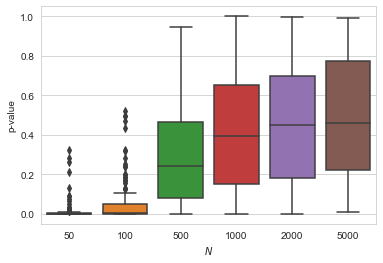

In [ ]:
fname = "data/__filedata__.txt"

fields = ['p_value']
field_plot_names = {
                    'p_value': 'p-value',
                    'N': r'$N$'
                    }
def kwargs_gen(**kwargs):
    return kwargs

conditions = kwargs_gen(
                          D=1,
                          N_test=500,
                          num_bootstrap=200,
                          sigma=1,
                          lmbda=0.01,
                        )

# x-axis of plot
x_field = 'N'
x_field_values = [50, 100, 500, 1000, 2000, 5000]

df = pd.read_csv(fname, index_col=0)

for field in fields:
    fig = plt.figure()
    
    # filter out desired entries
    mask = (df[field] == df[field])
    for k,v in conditions.items():
        mask &= (df[k] == v)
    current = df.loc[mask]
    
    # only use desired values of x_fields
    current = current.loc[[True if x in x_field_values else False for x in current[x_field]]]
    
    # use ints on x-axis
    current[x_field] = current[x_field].astype(int)
    
    sns.set_style("whitegrid")
    sns.boxplot(x=x_field, y=field, data=current.sort_values(x_field))

    plt.xlabel(field_plot_names[x_field])
    plt.ylabel(field_plot_names[field])

    fname_base = os.path.splitext(fname)[0]
    plt.savefig(fname_base + ".png", bbox_inches='tight')
    plt.savefig(fname_base + ".eps", bbox_inches='tight')
    
    # print info on number of trials
    print(field)
    print("Average number of trials: %d" % int(np.round(current.groupby(x_field).apply(len).mean())))
    print(current.groupby(x_field).apply(len))
    
plt.show()

The plot above shows how the distribution of p-values evolves as a function of $N$. The distribution is uniform for $N = 5000$, but at $N = 500$ the null hypothesis would very rarely be rejected.

Next the random fourier feature approximation to this model is considred, where the log pdf, f is approximated using a finite dictionary of random Fourier features. The same test power $N_{test} = 500$ as before and a large number of available samples $N = 5 * 10^4$ were used.

In [ ]:
D = 1
N_test = 500
N_fit = 50000
ms_fit = np.array([1, 2, 5, 10, 25, 50, 75, 100, 250, 500, 1000, 2000, 5000])

sigma = 1
lmbda = 0.01

grad = lambda x: est.grad(np.array([x]))[0]
s =  GaussianQuadraticTest(grad)
num_bootstrap = 200

result_fname = os.path.splitext(os.path.basename("data/__filefeatures__"))[0] + ".txt"

num_repetitions = 150
for _ in range(num_repetitions):
    for m in ms_fit:
        est = KernelExpFiniteGaussian(sigma, lmbda, m, D)
        X_test = np.random.randn(N_test, D)
        
        X = np.random.randn(N_fit, D)
        est.fit(X)
        
        U_matrix, stat = s.get_statistic_multiple(X_test[:,0])
    
        bootsraped_stats = np.empty(num_bootstrap)
        for i in range(num_bootstrap):
            W = np.sign(np.random.randn(N_test))
            WW = np.outer(W, W)
            st = np.mean(U_matrix * WW)
            bootsraped_stats[i] = N_test * st
        
        p_value = np.mean(bootsraped_stats>stat)
        print (m, p_value)

        store_results(result_fname,
                      D=D,
                      N_fit=N_fit,
                      N_test=N_test,
                      m=m,
                      num_bootstrap=num_bootstrap,
                      sigma=sigma,
                      lmbda=lmbda,
                      p_value=p_value
                      )

1 0.0
2 0.0
5 0.83
10 0.23
25 0.66
50 0.255
75 0.69
100 0.28
250 0.465
500 0.595
1000 0.75
2000 0.09
5000 0.985
1 0.0
2 0.075
5 0.975
10 0.005
25 0.35
50 0.72
75 0.55
100 0.605
250 0.25
500 0.395
1000 0.64
2000 0.13
5000 0.145
1 0.0
2 0.0
5 0.82
10 0.335
25 0.93
50 0.07
75 0.195
100 0.985
250 0.705
500 0.925
1000 0.25
2000 0.14
5000 0.775
1 0.0
2 0.005
5 0.095
10 0.32
25 0.76
50 0.53
75 0.72
100 0.21
250 0.745
500 0.405
1000 0.155
2000 0.585
5000 0.015
1 0.0
2 0.0
5 0.565
10 0.65
25 0.675
50 0.27
75 0.745
100 0.61
250 0.805
500 0.45
1000 0.305
2000 0.225
5000 0.64
1 0.0
2 0.0
5 0.355
10 0.41
25 0.92
50 0.105
75 0.04
100 0.88
250 0.0
500 0.415
1000 0.925
2000 0.715
5000 0.225
1 0.0
2 0.0
5 0.045
10 0.78
25 0.35
50 0.32
75 0.25
100 0.01
250 0.19
500 0.935
1000 0.55
2000 0.01
5000 0.175
1 0.0
2 0.11
5 0.25
10 0.16
25 0.125
50 0.675
75 0.9
100 0.94
250 0.325
500 0.02
1000 0.735
2000 0.65
5000 0.355
1 0.0
2 0.1
5 0.36
10 0.555
25 0.8
50 0.935
75 0.08
100 0.825
250 0.595
500 0.365
1000 0.195

p_value
Average number of trials: 150
m
5       150
10      150
50      150
100     150
500     150
2000    150
5000    150
dtype: int64


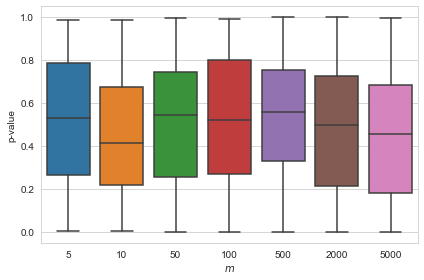

In [ ]:
fname = "__filefeatures__.txt"

fields = ['p_value']
field_plot_names = {
                    'p_value': 'p-value',
                    'm': r'$m$'
                    }
def kwargs_gen(**kwargs):
    return kwargs

conditions = kwargs_gen(
                          D=1,
                          N_test=500,
                          N_fit=50000,
                          num_bootstrap=200,
                          sigma=1,
                          lmbda=0.01,
                        )

# x-axis of plot
x_field = 'm'
x_field_values = [5, 10, 50, 100, 500, 2000, 5000]

df = pd.read_csv(fname, index_col=0)

for field in fields:
    plt.figure()
    
    # filter out desired entries
    mask = (df[field] == df[field])
    for k, v in conditions.items():
        mask &= (df[k] == v)
    current = df.loc[mask]
    
    # only use desired values of x_fields
    current = current.loc[[True if x in x_field_values else False for x in current[x_field]]]

    # use ints on x-axis
    current[x_field] = current[x_field].astype(int)

    sns.set_style("whitegrid")
    sns.boxplot(x=x_field, y=field, data=current.sort_values(x_field))

    plt.xlabel(field_plot_names[x_field])
    plt.ylabel(field_plot_names[field])
    
    plt.tight_layout()

    fname_base = os.path.splitext(fname)[0]
    plt.savefig(fname_base + ".png", bbox_inches='tight')
    plt.savefig(fname_base + ".eps", bbox_inches='tight')
    
    # print info on number of trials
    print(field)
    print("Average number of trials: %d" % int(np.round(current.groupby(x_field).apply(len).mean())))
    print(current.groupby(x_field).apply(len))
    
plt.show()

The plot shows the distributions of p-values for an increasing number of random features m. 

# Conclusions

*   In our project we proposed a nonparametric statistical test for goodness-of-fit of Chwialkowski et al. (2016). Given a set of samples, the test determines how likely it is that these were generated from a target density function.

*   If you know your data is correlated, authors recommend to thin a chain so
that $Cor(X_t, X_{t−1}) < 0.5$, set $a_n = 0.1/k$, and run test
with at least $max(500k, d100)$ data points, where $k < 10$,
and $d$ is data dimensionality.

*   In the implementation of statistical model criticism on GP we saw that the Gaussian noise model was a poor fit for the chosen solar dataset. The test statistic lied in an upper quantile of the bootstrapped null distribution which shows that it is unlikely the test points were generated by the fitted GP model.

*   In the nonparametric density estimation we observed how the distribution of p-values evolves as a function of $N$ (number of observations) and the distributions of p-values for an increasing number of random features m.



# References

Chwialkowski, K., Strathmann, H., & Gretton, A. (2016, June). A kernel 
test of goodness of fit. JMLR: Workshop and Conference Proceedings

# Contributions

The experiments of the authors are the separated pieces of code in folders on GitHub. Each team member took several folders to investigate what is done in them. Then we discussed everything in Zoom trying to take the whole picture of the experiments. The work was implemented on shared Notebooks in Google Colaboratory and saved on Google Drive. Hence, it is hard to specify the contribution of each group member. The presentation, experiments and the report were done by the whole team together.